In [2]:
%load_ext autoreload
%autoreload 2

import sys

from sklearn.tree import export_text

sys.path.append('../..')
from viz import *
import viz
import imodels
from os.path import join as oj

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
from imodels.util.data_util import get_clean_dataset
from config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
from sklearn.tree import DecisionTreeClassifier
from util import DATASET_PATH
print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 11 9


# overarching plots

In [5]:
datasets

[('readmission', 'readmission_clean', 'imodels'),
 ('credit', 'credit_card_clean', 'imodels'),
 ('recidivism', 'compas_two_year_clean', 'imodels'),
 ('juvenile', 'juvenile_clean', 'imodels'),
 ('german-credit', 'german', 'pmlb'),
 ('diabetes', 'diabetes', 'pmlb')]

[ 1  4  7 10 13 16 25 30] [ 1  3  7 15 31]


<Figure size 2250x625 with 0 Axes>

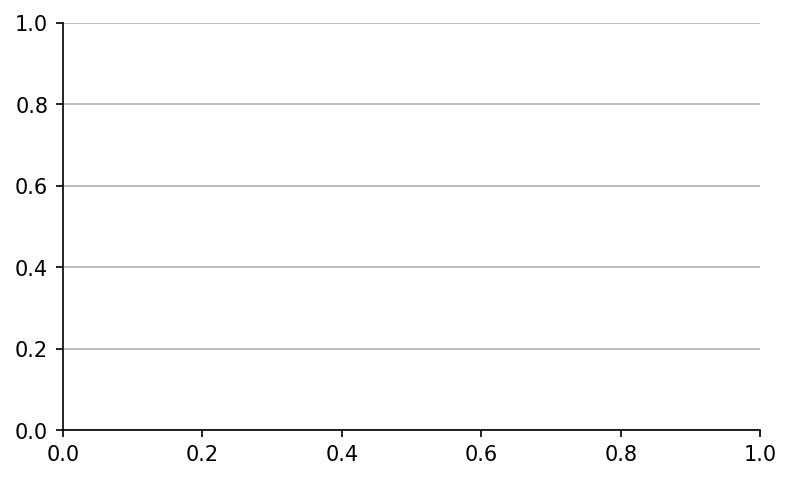

In [18]:
num_dsets = 1
datasets = DATASETS_CLASSIFICATION[::-1][:6] #+ DATASETS_REGRESSION[::-1]

R, C = ceil(num_dsets / 3), 3
plt.figure(figsize=(3 * C, 2.5 * R), facecolor='w')

COLORS = [cb, cg, cr, 'gray', cp, 'green']
COLORS = COLORS + COLORS + COLORS
plt.figure(figsize=(6, 3.6), dpi=150)
# for i, dset in enumerate(tqdm(datasets)):
dset = datasets[0]
dset_name = dset[0]
#     print(dset_name)

pkl_file = oj('../../results', 'saps', dset_name, 'train-test/seed0/results_aggregated.pkl')
data = pkl.load(open(pkl_file, 'rb'))  #['df']

rules = data['df_rules']
#     rules['model'] = rules.index
rules.index = np.arange(rules.shape[0])

df = data['df']
#     df['model'] = df.index
df.index = np.arange(df.shape[0])

cols_to_use = df.columns.difference(rules.columns)
d = rules.join(df[cols_to_use])

# SAPS
#     print('d', d)
g = d[d.estimator == 'SAPS']
#     print('g', g)
name = 'SAPS'
est_params = g[dset_name]
#     print(est_params.iloc[0])
trees = [x['trees_'] for x in est_params]
#     print(trees)
n_trees = np.array([len(t) for t in trees])
x = g['complexity'].values
#     plt.plot(x, n_trees)

# CART
THRESH_REPEAT = 0.1
g = d[d.estimator == 'CART']
est_params = g[dset_name]
trees = [x['tree_'] for x in est_params]
#     print(g)
#     print(trees)
x2 = g['complexity'].values
# plt.plot(x, x2)
print(x, x2)
    
# plt.legend(labelcolor='linecolor')
dvu.line_legend(adjust_text_labels=True, extra_spacing=0.5)
plt.grid(axis='y')